In [1]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("006 Titanic").getOrCreate()

In [2]:
datos=spark.read.csv("train.csv",header=True,inferSchema=True)

In [3]:
datos.printSchema(),datos.first()

root
 |-- survived: integer (nullable = true)
 |-- pclass: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: double (nullable = true)
 |-- sibsp: integer (nullable = true)
 |-- parch: integer (nullable = true)
 |-- ticket: string (nullable = true)
 |-- fare: double (nullable = true)
 |-- cabin: string (nullable = true)
 |-- embarked: string (nullable = true)



(None,
 Row(survived=0, pclass=3, name='Braund, Mr. Owen Harris', sex='male', age=22.0, sibsp=1, parch=0, ticket='A/5 21171', fare=7.25, cabin=None, embarked='S'))

In [4]:
datos.columns

['survived',
 'pclass',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked']

In [5]:
datosFinales=datos.select(['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked'])

In [6]:
datosFinales.count()

891

In [7]:
datosFinales=datosFinales.na.drop()

In [8]:
datosFinales.show()

+--------+------+------+----+-----+-----+-------+--------+
|survived|pclass|   sex| age|sibsp|parch|   fare|embarked|
+--------+------+------+----+-----+-----+-------+--------+
|       0|     3|  male|22.0|    1|    0|   7.25|       S|
|       1|     1|female|38.0|    1|    0|71.2833|       C|
|       1|     3|female|26.0|    0|    0|  7.925|       S|
|       1|     1|female|35.0|    1|    0|   53.1|       S|
|       0|     3|  male|35.0|    0|    0|   8.05|       S|
|       0|     1|  male|54.0|    0|    0|51.8625|       S|
|       0|     3|  male| 2.0|    3|    1| 21.075|       S|
|       1|     3|female|27.0|    0|    2|11.1333|       S|
|       1|     2|female|14.0|    1|    0|30.0708|       C|
|       1|     3|female| 4.0|    1|    1|   16.7|       S|
|       1|     1|female|58.0|    0|    0|  26.55|       S|
|       0|     3|  male|20.0|    0|    0|   8.05|       S|
|       0|     3|  male|39.0|    1|    5| 31.275|       S|
|       0|     3|female|14.0|    0|    0| 7.8542|       

In [9]:
from pyspark.ml.feature import (VectorAssembler,
                                StringIndexer,
                               OneHotEncoder) #varias importaciones

In [10]:
#Conversión de columnas de texto a números
generoIndexado=StringIndexer(inputCol="sex",outputCol="indiceGenero")
datosFinales2=generoIndexado.fit(datosFinales).transform(datosFinales)
generoVectorizado=OneHotEncoder(inputCol="indiceGenero",outputCol="vectorGenero")
datosFinales3=generoVectorizado.transform(datosFinales2)
embarqueIndexado=StringIndexer(inputCol="embarked",outputCol="indiceEmbarque")
datosFinales4=embarqueIndexado.fit(datosFinales3).transform(datosFinales3)
embarqueVectorizado=OneHotEncoder(inputCol="indiceEmbarque",outputCol="vectorEmbarque")
datosFinales5=embarqueVectorizado.transform(datosFinales4)
datosFinales5.show()

+--------+------+------+----+-----+-----+-------+--------+------------+-------------+--------------+--------------+
|survived|pclass|   sex| age|sibsp|parch|   fare|embarked|indiceGenero| vectorGenero|indiceEmbarque|vectorEmbarque|
+--------+------+------+----+-----+-----+-------+--------+------------+-------------+--------------+--------------+
|       0|     3|  male|22.0|    1|    0|   7.25|       S|         0.0|(1,[0],[1.0])|           0.0| (2,[0],[1.0])|
|       1|     1|female|38.0|    1|    0|71.2833|       C|         1.0|    (1,[],[])|           1.0| (2,[1],[1.0])|
|       1|     3|female|26.0|    0|    0|  7.925|       S|         1.0|    (1,[],[])|           0.0| (2,[0],[1.0])|
|       1|     1|female|35.0|    1|    0|   53.1|       S|         1.0|    (1,[],[])|           0.0| (2,[0],[1.0])|
|       0|     3|  male|35.0|    0|    0|   8.05|       S|         0.0|(1,[0],[1.0])|           0.0| (2,[0],[1.0])|
|       0|     1|  male|54.0|    0|    0|51.8625|       S|         0.0|(

In [11]:
constructor=VectorAssembler(inputCols=[
 'pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
'vectorGenero',
'vectorEmbarque'
],outputCol="features")

datosConVector=constructor.transform(datosFinales5)

In [12]:
datosConVector.show()

+--------+------+------+----+-----+-----+-------+--------+------------+-------------+--------------+--------------+--------------------+
|survived|pclass|   sex| age|sibsp|parch|   fare|embarked|indiceGenero| vectorGenero|indiceEmbarque|vectorEmbarque|            features|
+--------+------+------+----+-----+-----+-------+--------+------------+-------------+--------------+--------------+--------------------+
|       0|     3|  male|22.0|    1|    0|   7.25|       S|         0.0|(1,[0],[1.0])|           0.0| (2,[0],[1.0])|[3.0,22.0,1.0,0.0...|
|       1|     1|female|38.0|    1|    0|71.2833|       C|         1.0|    (1,[],[])|           1.0| (2,[1],[1.0])|[1.0,38.0,1.0,0.0...|
|       1|     3|female|26.0|    0|    0|  7.925|       S|         1.0|    (1,[],[])|           0.0| (2,[0],[1.0])|(8,[0,1,4,6],[3.0...|
|       1|     1|female|35.0|    1|    0|   53.1|       S|         1.0|    (1,[],[])|           0.0| (2,[0],[1.0])|[1.0,35.0,1.0,0.0...|
|       0|     3|  male|35.0|    0|    0|

In [13]:
from pyspark.ml.classification import LogisticRegression

In [14]:
rLogic=LogisticRegression(labelCol="survived")

In [15]:
modelo=rLogic.fit(datosConVector)

In [16]:
modelo.summary.areaUnderROC

0.8601816365303983

In [17]:
modelo.summary.predictions.select("survived","prediction").show()

+--------+----------+
|survived|prediction|
+--------+----------+
|     0.0|       0.0|
|     1.0|       1.0|
|     1.0|       1.0|
|     1.0|       1.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     1.0|       1.0|
|     1.0|       1.0|
|     1.0|       1.0|
|     1.0|       1.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       1.0|
|     1.0|       1.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     0.0|       0.0|
|     1.0|       0.0|
|     1.0|       1.0|
+--------+----------+
only showing top 20 rows



In [18]:
modelo.summary.roc.show(100)

+--------------------+--------------------+
|                 FPR|                 TPR|
+--------------------+--------------------+
|                 0.0|                 0.0|
|0.002358490566037...|0.017361111111111112|
|0.002358490566037...|0.041666666666666664|
|0.002358490566037...|              0.0625|
|0.002358490566037...| 0.08333333333333333|
|0.002358490566037...| 0.10416666666666667|
|0.002358490566037...|               0.125|
|0.004716981132075...|  0.1423611111111111|
|0.004716981132075...| 0.16319444444444445|
|0.004716981132075...|  0.1840277777777778|
|0.004716981132075...|  0.2048611111111111|
|0.007075471698113208|  0.2222222222222222|
|0.007075471698113208| 0.24305555555555555|
|0.007075471698113208|  0.2638888888888889|
|0.007075471698113208|  0.2847222222222222|
|0.007075471698113208|  0.3055555555555556|
|0.009433962264150943|  0.3263888888888889|
|0.009433962264150943|  0.3472222222222222|
|0.009433962264150943|  0.3715277777777778|
| 0.01179245283018868|  0.388888

In [19]:
modelo.coefficients

DenseVector([-1.1993, -0.0433, -0.3632, -0.0603, 0.0014, -2.6385, 0.4223, 0.8235])

In [20]:
modelo.summary

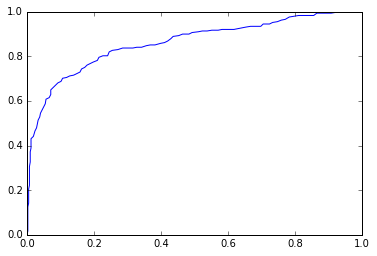

In [22]:
import matplotlib.pyplot as grafica
x=modelo.summary.roc.select("FPR").collect()
y=modelo.summary.roc.select("TPR").collect()

grafica.plot(x,y)
grafica.show()